In [55]:
from titanfp import bench
bench.sweep_verbose = True
bench.use_one_ulp = False

data = bench.sweep_core_2arg_multi(bench.cores['add'], range(-14,16), range(1, 12), 100, 64, bench.ctx128)

print(len(data))

points = {}
for x, y in data:
    if (x, y) in points:
        points[(x, y)] += 1
    else:
        points[(x, y)] = 1

xs = []
ys = []
colors = []
maxc = 0

for (x, y), count in points.items():
    xs.append(x)
    ys.append(y)
    #c = count.bit_length()
    c = count
    colors.append(c)
    if c > maxc:
        maxc = c
        
greyscale = [str(1 - (c / maxc)) for c in colors]


# cdf per x point

cdfs = {}
for (x, y), count in points.items():
    if x not in cdfs:
        cdfs[x] = {}
    cdfs[x][y-x] = count
    
cdf_xys = {}
for cdf_x, cdf in cdfs.items():
    sum = 0
    cdf_xs = []
    cdf_ys = []
    for x in sorted(cdf):
        sum += cdf[x]
        cdf_xs.append(x)
        cdf_ys.append(sum)
    cdf_ys = [y / sum for y in cdf_ys]
    cdf_xys[cdf_x] = [cdf_xs, cdf_ys] 
    

print(len(greyscale))

FPCore (x y)
  name: None
   pre: None
  spec: None
  (+ x y)
running with 64 total bits, 8 processes

10890000
274


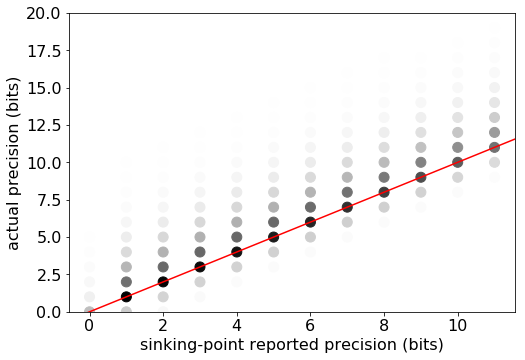

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import matplotlib
matplotlib.rcParams.update({'font.size': 16})


fig, ax = plt.subplots()

fig.set_size_inches(8, 5.5)

ax.set_ylim(0, 20)
ax.set_xlabel('sinking-point reported precision (bits)')
ax.set_ylabel('actual precision (bits)')

ax.scatter(xs, ys, s=100, color=greyscale)
#plt.ylim((0, 16))
#plt.xlim((0, 16))

xlim = ax.get_xlim()
line = mlines.Line2D(xlim, xlim, color='red')
#transform=ax.transAxes
#line.set_transform(transform)
ax.add_line(line)

plt.show()

# Write this as a cdf:

# one line for each number of ground truth bits bits
# plot % of reported bits

# x axis is y axis - x axis
# y axis is % points that are less than x axis
# separate line for each x axis position


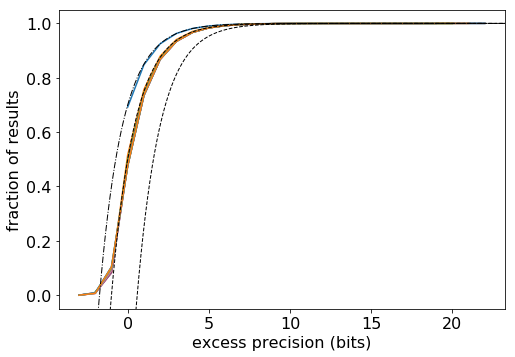

In [54]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

fig.set_size_inches(8, 5.5)

ax.set_xlabel('excess precision (bits)')
ax.set_ylabel('fraction of results')

for x_name, (cdf_xs, cdf_ys) in cdf_xys.items():
    ax.plot(cdf_xs, cdf_ys)
    
    
x_min, x_max = ax.get_xlim()
ref_x = np.linspace(x_min, x_max, 1000)
ref_y_one = [1 - (3/2) * (2**-x) for x in ref_x]
ref_y_zero = [1 - (1/2) * (2**-x) for x in ref_x]
ref_y_cancel = [1 - (0.3) * (2**-x) for x in ref_x]

line_one = mlines.Line2D(ref_x, ref_y_one, color='black', linestyle='--', linewidth=1)
line_zero = mlines.Line2D(ref_x, ref_y_zero, color='black', linestyle='--', linewidth=1)
line_cancel = mlines.Line2D(ref_x, ref_y_cancel, color='black', linestyle='-.', linewidth=1)
ax.add_line(line_one)
ax.add_line(line_zero)
ax.add_line(line_cancel)


In [34]:
cdf_xys

{0: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16],
  [0.6953134222641955,
   0.8486306221225357,
   0.9264549639948058,
   0.9637587061740054,
   0.9823810648093495,
   0.9909101640892457,
   0.9953960571361115,
   0.9979341282021013,
   0.9988195018297722,
   0.9994982882776532,
   0.9998524377287216,
   0.9998819501829772,
   0.9999409750914886,
   0.9999704875457444,
   1.0]],
 1: [[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
  [0.08652394517056866,
   0.5170060803604818,
   0.7574734878739052,
   0.8796670344738434,
   0.9401012931730987,
   0.9704800114497297,
   0.9852215384189216,
   0.9927561992437638,
   0.996301921984866,
   0.9983056246797076,
   0.999099718835267,
   0.9996168034016778,
   0.9998014764611102,
   0.9999122802967696,
   0.9999492149086561,
   0.9999584485616277,
   0.9999861495205425,
   0.9999907663470283,
   0.9999953831735142,
   1.0]],
 2: [[-2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   1